## About

This plot is a [circular bar plot](https://python-graph-gallery.com/circular-barplot/). Let's see what the final output will look like:

As a teaser, here is the plot we’re gonna try building:

![scatterplot](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-polar-chart.png?raw=true)

## Libraries

For creating this chart, we will need a whole bunch of libraries!

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt # plotting the chart
from matplotlib.cm import ScalarMappable # creating scalar mappable objects for color mapping
from matplotlib.lines import Line2D # creating custom lines
import matplotlib.patches as mpatches # customize graphical shapes and patches
from matplotlib.patches import Patch
from textwrap import wrap # countries name lisibility

import numpy as np # arrays and mathematical functions
import pandas as pd # data manipulation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # adding inset axes within a larger plot

## Dataset

The data can be accessed using the **url below**. 

In [5]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/polar_data.csv'
df = pd.read_csv(url)

## Create variables for the chart

To make the code clearer, we first create a first code chunk containing variable definitions, used later in the customization of the graph. 

- We specify that we want to use the `Times` **font** and that the color of the text is `"#1f1f1f"`
- We define a custom color map (`cmap`) using a **list of color** values. This color map will be used to map values to colors in our plot
- We also create a **normalizer** to map data values to the range [0, 1], which corresponds to colors in our `cmap`. In this case, we're using the `'Cont_code'` values from `df` to determine the color mapping range

In [3]:
# Set default font to Bell MT, Bell is the prettiest serif IMO
plt.rcParams.update({"font.family": "Times"})

# Set default font color to GREY12
plt.rcParams["text.color"] = "#1f1f1f"

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ['#914F76','#A2B9B6','tan','#4D6A67','#F9A03F','#5B2E48','#2B3B39']
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=7)

# Normalizer
NUMBERS = df['Cont_code'].values
norm = mpl.colors.Normalize(vmin= NUMBERS.min(), vmax= NUMBERS.max())
COLORS = cmap(norm(NUMBERS))

## Creating the chart

The chart is displayed in `polar coordinates`, which means it's a **circular chart** with bars extending radially from the center.

- It sets up a polar plot with a **white background** and adjusts some plot properties like the angle offset, y-axis scale, and labels.

- It **adds bars** representing the number of Spanish learners in various countries, where the **angle of each bar** corresponds to the country's position on the circle.

- **Dashed vertical** lines are added as references.

- **Dots** are added to represent the mean gain of native Spanish speakers in those countries

- **Country names** are wrapped for better readability, and labels for the regions are set on the x-axis

- **Titles**, a **scale**, and **credit/sources** information are added to the chart

- Finally, a **legend** is included to explain the color coding used in the chart

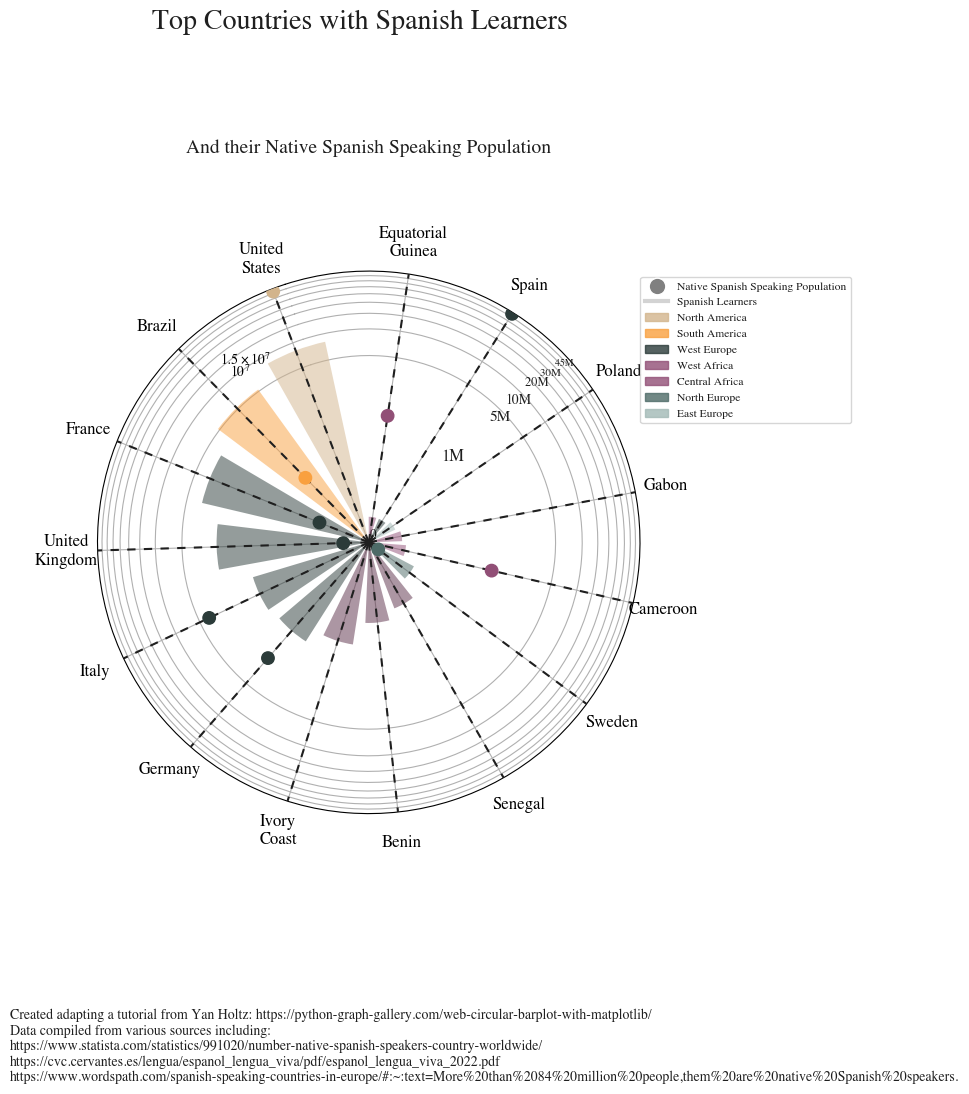

In [4]:
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(7, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(0, 45000000)
ax.set_yscale('symlog', linthresh=500000)

# Add bars
ANGLES = np.linspace(0.05, 2*np.pi - 0.05, len(df), endpoint = False)
LENGTHS = df['Students'].values
ax.bar(ANGLES, LENGTHS,
       color=COLORS, alpha=0.5,
       width=0.3, zorder=11,
       label='Spanish Learners')

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 45000000, color="#1f1f1f", ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
MEAN_GAIN = df['Natives'].values
ax.scatter(ANGLES, MEAN_GAIN, s=80, color= COLORS, zorder=11, label = 'Native Spanish Speakers')

# Add labels for the regions
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in df['Country'].values]

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12)
ax.set_yticks(np.arange(0,45000000,
                        step=5000000))

# Add title and subtile at the top of the chart
plt.suptitle('Top Countries with Spanish Learners',
             size = 20, y = 0.95)
plt.title('And their Native Spanish Speaking Population',
          style = 'italic', size = 14, pad = 85)

# Add scale starting at 1M and ending at 45M
PAD = 10
ax.text(-0.75 * np.pi / 2, 1000000 + PAD, "1M", ha="right", size=12)
ax.text(-0.75 * np.pi / 2, 5000000 + PAD, "5M", ha="right", size=11)
ax.text(-0.75 * np.pi / 2, 10000000 + PAD, "10M", ha="right", size=10)
ax.text(-0.75 * np.pi / 2, 20000000 + PAD, "20M ", ha="right", size=9)
ax.text(-0.75 * np.pi / 2, 30000000 + PAD, "30M ", ha="right", size=8)
ax.text(-0.75 * np.pi / 2, 46000000 + PAD, "45M ", ha="right", size=7)
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(12)

# Add credit and sources
caption = "\n".join(["Created adapting a tutorial from Yan Holtz: https://python-graph-gallery.com/web-circular-barplot-with-matplotlib/",
                     "Data compiled from various sources including:",
                     "https://www.statista.com/statistics/991020/number-native-spanish-speakers-country-worldwide/",
                     "https://cvc.cervantes.es/lengua/espanol_lengua_viva/pdf/espanol_lengua_viva_2022.pdf",
                     "https://www.wordspath.com/spanish-speaking-countries-in-europe/#:~:text=More%20than%2084%20million%20people,them%20are%20native%20Spanish%20speakers."
])
fig.text(0, 0.1, caption, fontsize=10, ha="left", va="baseline")

# First, make some room for the legend and the caption in the bottom.
fig.subplots_adjust(bottom=0.175)

# Add customed legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Native Spanish Speaking Population',
                          markerfacecolor='gray', markersize=12),
                          Line2D([0],[0] ,color = 'lightgray', lw = 3, label = 'Spanish Learners'),
                          mpatches.Patch(color='tan', label='North America', alpha = 0.8),
                          mpatches.Patch(color='#F9A03F', label='South America', alpha = 0.8),
                          mpatches.Patch(color='#2B3B39', label='West Europe', alpha = 0.8),
                          mpatches.Patch(color='#914F76', label='West Africa', alpha = 0.8),
                          mpatches.Patch(color='#914F76', label='Central Africa', alpha = 0.8),
                          mpatches.Patch(color='#4D6A67', label='North Europe', alpha = 0.8),
                          mpatches.Patch(color='#A2B9B6', label='East Europe', alpha = 0.8)]
ax.legend(handles=legend_elements,
          loc='upper right', # location
          bbox_to_anchor=(1.4, 1), # shift the legend
          fontsize = 'small')

# Display the final chart
plt.show()

## Going further

This article explains how to reproduce a [line chart](https://python-graph-gallery.com/line-chart/) with small multiples, originally design by Gilbert Fontana. 

For more examples of **advanced customization**, check out this [other reproduction of Fontana](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/)'s work. Also, you might be interested in [adding an image/logo](https://python-graph-gallery.com/513-add-logo-matplotlib/) to your chart. 